In [1]:
#RANDOM ASSORTED NOTES



#While the cross validations themselves aren't terribly useful for much, they do help show that it's not LUCK
#producing any given set of results, aka we didn't land some magic combination of train/test data that just 
#happens to produce really good test results.
#The reason I say this is because, on their own, they are only doing the dead on accuracies rather than the slightly
#expanded ranges that we use for the 'correct enough'-ness of what we're doing otherwise.

In [2]:
import pandas as pd
import numpy as np

In [3]:
mainData = pd.read_csv("vgscore.csv")
mainData = mainData.drop(labels = ['url', 'tot_ship', 'tot_sale', 'na_sale', 'pal_sale', 'jp_sale', 'other_sale', 'last_update'], axis = 1)
mainData.rename(columns = {'title' : 'Name'}, inplace = True)
mainData

,Name,user_Score,release_Date,console,publisher,developer,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,Nintendo,Nintendo EAD,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,PUBG Corporation,PUBG Corporation,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,Nintendo,Nintendo EAD,8.8
...,...,...,...,...,...,...,...
55859,ZOMBIE GOLD RUSH,N/A,26th Oct 17,NS,Amazing Inc.,Amazing Inc.,N/A
55860,Zombillie,N/A,29th Mar 18,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,N/A
55861,Zone of the Enders: The 2nd Runner MARS,N/A,06th Sep 18,PC,Konami,Cygames,N/A
55862,Zoo Tycoon: Ultimate Animal Collection,N/A,31st Oct 17,XOne,Microsoft Studios,Frontier Developments,N/A


In [4]:
#sorry this is slow but the data has every name entry having spaces...
for c in range(len(mainData)):
    mainData["Name"][c] = mainData["Name"][c].strip()
mainData

,Name,user_Score,release_Date,console,publisher,developer,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,Nintendo,Nintendo EAD,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,PUBG Corporation,PUBG Corporation,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,Nintendo,Nintendo EAD,8.8
...,...,...,...,...,...,...,...
55859,ZOMBIE GOLD RUSH,N/A,26th Oct 17,NS,Amazing Inc.,Amazing Inc.,N/A
55860,Zombillie,N/A,29th Mar 18,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,N/A
55861,Zone of the Enders: The 2nd Runner MARS,N/A,06th Sep 18,PC,Konami,Cygames,N/A
55862,Zoo Tycoon: Ultimate Animal Collection,N/A,31st Oct 17,XOne,Microsoft Studios,Frontier Developments,N/A


In [5]:
saleData = pd.read_csv("vgsales.csv")
saleData = saleData.drop(labels = ['Rank', 'Year', 'Publisher'], axis = 1)#Platform
saleData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01


In [6]:
finalData = saleData.merge(mainData, left_on=['Name', 'Platform'], right_on=['Name', 'console'])#, sort = True
finalData.drop(labels = ['console'], axis = 1, inplace = True)
finalData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user_Score,release_Date,publisher,developer,VGscore
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74,N/A,19th Nov 06,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,8.2,18th Oct 85,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82,9.1,27th Apr 08,Nintendo,Nintendo EAD,8.7
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00,8.8,26th Jul 09,Nintendo,Nintendo EAD,8.8
4,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26,N/A,01st Jun 89,Nintendo,Bullet Proof Software,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01,N/A,02nd Dec 03,Kemco,Tantalus Interactive,N/A
15891,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01,N/A,07th Feb 03,Infogrames,Melbourne House,N/A
15892,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01,N/A,28th Oct 08,Activision,Left Field Productions,N/A
15893,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01,N/A,28th Oct 10,7G//AMES,Bitfield GmbH,N/A


In [7]:
finalData.sort_values(by = 'Global_Sales', ascending = False, axis = 0, inplace = True)##ignore_index = True, inplace = True)
finalData.reset_index(drop=True, inplace=True)
finalData['platformID'] = finalData.groupby('Platform').ngroup()
finalData['genreID'] = finalData.groupby('Genre').ngroup()
finalData['publisherID'] = finalData.groupby('publisher').ngroup()
finalData['developerID'] = finalData.groupby('developer').ngroup()
finalData['user_Score'] = pd.to_numeric(finalData['user_Score'], 'coerce')
finalData['VGscore'] = pd.to_numeric(finalData['VGscore'], 'coerce')
finalData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user_Score,release_Date,publisher,developer,VGscore,platformID,genreID,publisherID,developerID
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74,NaN,19th Nov 06,Nintendo,Nintendo EAD,NaN,24,10,353,1459
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,8.2,18th Oct 85,Nintendo,Nintendo EAD,NaN,10,4,353,1459
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82,9.1,27th Apr 08,Nintendo,Nintendo EAD,8.7,24,6,353,1459
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00,8.8,26th Jul 09,Nintendo,Nintendo EAD,8.8,24,10,353,1459
4,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,01st Jun 89,Nintendo,Bullet Proof Software,NaN,5,5,353,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,Satisfashion,Wii,Misc,0.01,0.00,0.00,0.00,0.01,NaN,08th Jun 10,Destineer,"eGames, Inc.",NaN,24,3,124,2386
15891,Homeworld Remastered Collection,PC,Strategy,0.00,0.01,0.00,0.00,0.01,NaN,25th Feb 15,Gearbox Software,Gearbox Software,NaN,12,11,188,851
15892,Metal Slug Anthology,PS2,Shooter,0.00,0.00,0.01,0.00,0.01,NaN,28th Mar 07,SNK Playmore,Terminal Reality,NaN,15,8,433,2093
15893,K-1 Grand Prix,PS,Fighting,0.01,0.01,0.00,0.00,0.01,NaN,25th Jan 00,Jaleco,Xing Entertainment,NaN,14,2,250,2336


In [8]:
cleansedData = finalData.drop(['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'publisher', 'developer'], axis = 1)
cleansedData['score'] = cleansedData[['VGscore', 'user_Score']].mean(axis = 1)
cleansedData = cleansedData.drop(['user_Score','VGscore'], axis = 1)
cleansedData['release_Date'] = pd.to_datetime(cleansedData['release_Date'], 'coerce', True, infer_datetime_format = True)
cleansedData.dropna(inplace = True, subset = ['release_Date'])

cleansedData

,Name,Global_Sales,release_Date,platformID,genreID,publisherID,developerID,score
0,Wii Sports,82.74,2006-11-19,24,10,353,1459,NaN
1,Super Mario Bros.,40.24,1985-10-18,10,4,353,1459,8.2
2,Mario Kart Wii,35.82,2008-04-27,24,6,353,1459,8.9
3,Wii Sports Resort,33.00,2009-07-26,24,10,353,1459,8.8
4,Tetris,30.26,1989-06-01,5,5,353,357,NaN
...,...,...,...,...,...,...,...,...
15890,Satisfashion,0.01,2010-06-08,24,3,124,2386,NaN
15891,Homeworld Remastered Collection,0.01,2015-02-25,12,11,188,851,NaN
15892,Metal Slug Anthology,0.01,2007-03-28,15,8,433,2093,NaN
15893,K-1 Grand Prix,0.01,2000-01-25,14,2,250,2336,NaN


In [9]:
testdata = cleansedData.copy()
testdata

,Name,Global_Sales,release_Date,platformID,genreID,publisherID,developerID,score
0,Wii Sports,82.74,2006-11-19,24,10,353,1459,NaN
1,Super Mario Bros.,40.24,1985-10-18,10,4,353,1459,8.2
2,Mario Kart Wii,35.82,2008-04-27,24,6,353,1459,8.9
3,Wii Sports Resort,33.00,2009-07-26,24,10,353,1459,8.8
4,Tetris,30.26,1989-06-01,5,5,353,357,NaN
...,...,...,...,...,...,...,...,...
15890,Satisfashion,0.01,2010-06-08,24,3,124,2386,NaN
15891,Homeworld Remastered Collection,0.01,2015-02-25,12,11,188,851,NaN
15892,Metal Slug Anthology,0.01,2007-03-28,15,8,433,2093,NaN
15893,K-1 Grand Prix,0.01,2000-01-25,14,2,250,2336,NaN


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
finalizingData = testdata.drop(labels = ["Name",'release_Date', "score"], axis = 1)

sections = 4
for i in range(sections):
    finalizingData.iloc[int(len(testdata)*(i*(1/sections))):int(1+len(testdata)*((i+1)*(1/sections))), 0] = int((sections - 1)-i)

    
xfull = finalizingData.drop(labels = "Global_Sales", axis = 1)
yfull = finalizingData["Global_Sales"].astype("int32")
xtrain, xtest, ytrain, ytest = train_test_split(xfull, yfull, test_size = .25)


y_test = ytest.to_numpy()
(unique, counts) = np.unique(y_test, return_counts = True)
print(unique)
print(counts)
finalizingData

[0 1 2 3]
[ 980  978 1001  998]


,Global_Sales,platformID,genreID,publisherID,developerID
0,3.0,24,10,353,1459
1,3.0,10,4,353,1459
2,3.0,24,6,353,1459
3,3.0,24,10,353,1459
4,3.0,5,5,353,357
...,...,...,...,...,...
15890,0.0,24,3,124,2386
15891,0.0,12,11,188,851
15892,0.0,15,8,433,2093
15893,0.0,14,2,250,2336


In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Correct Prediction:  42.60803639120546 %
One away Predictions:  37.90750568612585 %
Two away Predictions:  15.061915592620673 %
Three away Predictions:  4.4225423300480164 %

1 or less Away Prediction:  80.51554207733132 %
2 or less Away Prediction:  95.57745766995198 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


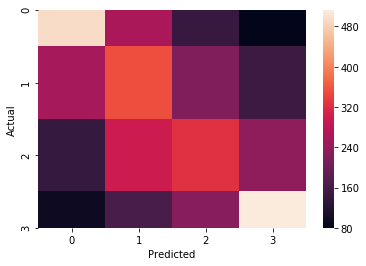

In [13]:
prediction = dtree.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(prediction)):
    if(prediction[i] == y_test[i]):
        accuracy += 1
        continue
        
    if(prediction[i] - 1 == y_test[i] or prediction[i] + 1 == y_test[i]):
        oneOff += 1;
        continue
        
    if(prediction[i] - 2 == y_test[i] or prediction[i] + 2 == y_test[i]):
        twoOff += 1;
        continue
        
    if(prediction[i] - 3 == y_test[i] or prediction[i] + 3 == y_test[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(prediction)*100,"%")
print("One away Predictions: ",oneOff/len(prediction)*100,"%")
print("Two away Predictions: ",twoOff/len(prediction)*100,"%")
print("Three away Predictions: ",threeOff/len(prediction)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(prediction)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(prediction)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': prediction, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [14]:
for i in range(2,30):
    print(i, " crossval Score:", sum(cross_val_score(dtree, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(dtree, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.3787597439954712
3  crossval Score: 0.39486985089714427
4  crossval Score: 0.40402974384900575
5  crossval Score: 0.4145138968700916
6  crossval Score: 0.4195020194356309
7  crossval Score: 0.4186812327732931
8  crossval Score: 0.41962080317343475
9  crossval Score: 0.42480427854858377
10  crossval Score: 0.4248633486766398
11  crossval Score: 0.42575036577473907
12  crossval Score: 0.4295320223511712
13  crossval Score: 0.4266990774540387
14  crossval Score: 0.42801472141371394
15  crossval Score: 0.43130881053884856
16  crossval Score: 0.42764382264594497
17  crossval Score: 0.4280185472146532
18  crossval Score: 0.4290971933951388
19  crossval Score: 0.42821634736454683
20  crossval Score: 0.4263760703481515
21  crossval Score: 0.430677846394665
22  crossval Score: 0.4290950708199311
23  crossval Score: 0.42854345780463726
24  crossval Score: 0.428773635747721
25  crossval Score: 0.4299016798025635
26  crossval Score: 0.4300279828530601
27  crossval Score: 0.427

In [15]:
randomforest = RandomForestClassifier()
randomforest.fit(xtrain, ytrain)

C:\Users\matts\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Correct Prediction:  43.34091483447055 %
One away Predictions:  38.61511245893354 %
Two away Predictions:  14.152135456153653 %
Three away Predictions:  3.8918372504422547 %

1 or less Away Prediction:  81.9560272934041 %
2 or less Away Prediction:  96.10816274955775 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


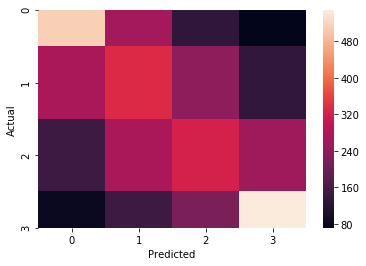

In [16]:
ranPredict = randomforest.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == y_test[i]):
        accuracy += 1
        continue
        
    if(ranPredict[i] - 1 == y_test[i] or ranPredict[i] + 1 == y_test[i]):
        oneOff += 1;
        continue
        
    if(ranPredict[i] - 2 == y_test[i] or ranPredict[i] + 2 == y_test[i]):
        twoOff += 1;
        continue
        
    if(ranPredict[i] - 3 == y_test[i] or ranPredict[i] + 3 == y_test[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(ranPredict)*100,"%")
print("One away Predictions: ",oneOff/len(ranPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(ranPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(ranPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(ranPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(ranPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': ranPredict, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print(df_conf.mode())
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [17]:
#This one is painfully slow
for i in range(2,3):
    temp = i*3
    print(temp, " crossval Score:", sum(cross_val_score(randomforest, xfull, yfull, cv=temp, n_jobs = -1))/temp)
print("Sectional crossval score:", sum(cross_val_score(randomforest, xfull, yfull, cv=sections, n_jobs = -1))/sections)

6  crossval Score: 0.4301830903879462
Sectional crossval score: 0.4219113531676727


In [18]:
knn = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

Correct Prediction:  42.63330806166288 %
One away Predictions:  38.4129390952742 %
Two away Predictions:  14.25322213798332 %
Three away Predictions:  4.700530705079606 %

1 or less Away Prediction:  81.04624715693708 %
2 or less Away Prediction:  95.29946929492039 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


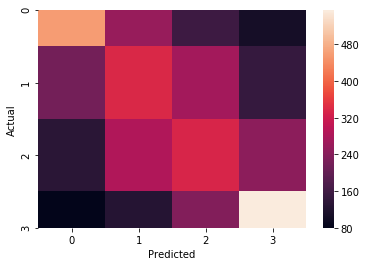

In [19]:
knnPredict = knn.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(knnPredict)):
    if(knnPredict[i] == y_test[i]):
        accuracy += 1
        continue
        
    if(knnPredict[i] - 1 == y_test[i] or knnPredict[i] + 1 == y_test[i]):
        oneOff += 1;
        continue
        
    if(knnPredict[i] - 2 == y_test[i] or knnPredict[i] + 2 == y_test[i]):
        twoOff += 1;
        continue
        
    if(knnPredict[i] - 3 == y_test[i] or knnPredict[i] + 3 == y_test[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(knnPredict)*100,"%")
print("One away Predictions: ",oneOff/len(knnPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(knnPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(knnPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(knnPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(knnPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': knnPredict, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print(df_conf.mode())
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [20]:
for i in range(2,35):
    print(i, " crossval Score:", sum(cross_val_score(knn, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(knn, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.38027431994486083
3  crossval Score: 0.3968284053575941
4  crossval Score: 0.40560834584469574
5  crossval Score: 0.41091261860067174
6  crossval Score: 0.410276513235542
7  crossval Score: 0.41425712409483006
8  crossval Score: 0.4109718132744448
9  crossval Score: 0.4179832205885737
10  crossval Score: 0.4215167497762435
11  crossval Score: 0.41368419571762194
12  crossval Score: 0.4187358002517578
13  crossval Score: 0.4252466068228579
14  crossval Score: 0.41987623558558074
15  crossval Score: 0.4214588854322695
16  crossval Score: 0.42064093721431367
17  crossval Score: 0.42106905474932316
18  crossval Score: 0.4232951662746184
19  crossval Score: 0.42442019545551407
20  crossval Score: 0.42088653027739314
21  crossval Score: 0.4221396005210594
22  crossval Score: 0.4201279555329834
23  crossval Score: 0.42589145338609097
24  crossval Score: 0.4229062730968218
25  crossval Score: 0.42370909959398134
26  crossval Score: 0.42050107829906597
27  crossval Score: 0

In [21]:
# End of just throwing the data at stuffs

In [22]:
#KNN Tuning Test, technically its results were used back on the previous KNN to know that k&p = 1 is better

accuraciesOne = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 1)
    
    knn.fit(xtrain, ytrain)
    knnPredict = knn.predict(xtest)
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_test[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_test[i] or knnPredict[i] + 1 == y_test[i]):
            oneOff += 1;
            continue
    accuraciesOne.append((accuracy + oneOff)/len(knnPredict))


accuraciesTwo = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 2)
    
    knn.fit(xtrain, ytrain)
    knnPredict = knn.predict(xtest)
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_test[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_test[i] or knnPredict[i] + 1 == y_test[i]):
            oneOff += 1;
            continue
    accuraciesTwo.append((accuracy + oneOff)/len(knnPredict))

81.04624715693708 %


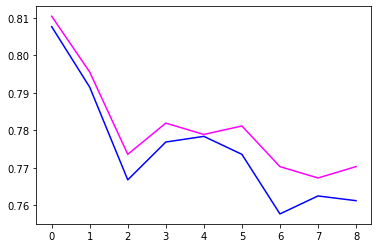

In [23]:
print(accuraciesOne[0]*100, '%')
plt.plot(accuraciesOne, color = 'magenta')
plt.plot(accuraciesTwo, color = 'blue')

In [24]:
#DATE TESTING NOW, THIS IS IMPORTANT SINCE THE TESTING DATA CHANGES NOW

In [25]:
#Adding release month to see if it helps at all
datetest = finalizingData.copy()
datetest['month'] = [i.month for i in testdata['release_Date']]
datetest['year'] = [i.year for i in testdata['release_Date']]

#Day makes KNN spas out
datetest['day'] = [i.day for i in testdata['release_Date']]
datetest

,Global_Sales,platformID,genreID,publisherID,developerID,month,year,day
0,3.0,24,10,353,1459,11,2006,19
1,3.0,10,4,353,1459,10,1985,18
2,3.0,24,6,353,1459,4,2008,27
3,3.0,24,10,353,1459,7,2009,26
4,3.0,5,5,353,357,6,1989,1
...,...,...,...,...,...,...,...,...
15890,0.0,24,3,124,2386,6,2010,8
15891,0.0,12,11,188,851,2,2015,25
15892,0.0,15,8,433,2093,3,2007,28
15893,0.0,14,2,250,2336,1,2000,25


In [26]:
#Setting up train test data
xDatefull = datetest.drop(labels = "Global_Sales", axis = 1)
yDatefull = datetest["Global_Sales"].astype("int32")
xDatetrain, xDatetest, yDatetrain, yDatetest = train_test_split(xDatefull, yDatefull, test_size = .25)


y_Datetest = yDatetest.to_numpy()
(unique, counts) = np.unique(y_Datetest, return_counts = True)
print(unique)
print(counts)
xDatetrain

[0 1 2 3]
[ 996  992  949 1020]


,platformID,genreID,publisherID,developerID,month,year,day
14271,12,9,314,1321,10,2002,25
3219,15,4,92,201,6,2004,22
14677,12,11,506,2068,6,2001,16
2867,24,10,485,309,11,2010,4
4000,15,0,450,2059,9,2001,24
...,...,...,...,...,...,...,...
8267,18,7,4,1998,10,2006,30
11221,15,0,437,587,3,2004,12
4830,7,10,135,624,10,2003,20
8573,4,5,182,902,11,2010,10


81.3747788728835 %


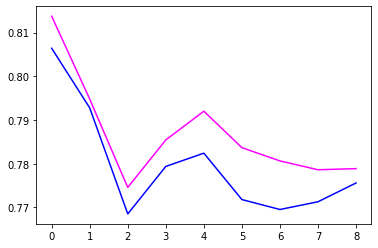

In [27]:
#KNN Tuning Test with Dates
#Note - this time both are on manhattan distance since it just kept winning and now I wished to test
#including the day or not.
#Magenta = no day, blue = day

accuraciesOne = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 1)
    
    knn.fit(xDatetrain.drop(['day'], axis = 1), yDatetrain)
    knnPredict = knn.predict(xDatetest.drop(['day'], axis = 1))
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_Datetest[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_Datetest[i] or knnPredict[i] + 1 == y_Datetest[i]):
            oneOff += 1;
            continue
    accuraciesOne.append((accuracy + oneOff)/len(knnPredict))


accuraciesTwo = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n, p = 1)
    
    knn.fit(xDatetrain, yDatetrain)
    knnPredict = knn.predict(xDatetest)
    
    accuracy = 0
    oneOff = 0
    twoOff = 0
    threeOff = 0
    for i in range(len(knnPredict)):
        if(knnPredict[i] == y_Datetest[i]):
            accuracy += 1
            continue

        if(knnPredict[i] - 1 == y_Datetest[i] or knnPredict[i] + 1 == y_Datetest[i]):
            oneOff += 1;
            continue
    accuraciesTwo.append((accuracy + oneOff)/len(knnPredict))
    

print(accuraciesOne[0]*100, "%")
plt.plot(accuraciesOne, color = 'magenta')
plt.plot(accuraciesTwo, color = 'blue')
#Note about the result, including month/year (and/or day) brings KNN up to par with random forest on this data,
#however, N = 1 is still the best.

Correct Prediction:  43.644174879959564 %
One away Predictions:  37.73060399292393 %
Two away Predictions:  14.379580490270408 %
Three away Predictions:  4.245640636846096 %

1 or less Away Prediction:  81.3747788728835 %
2 or less Away Prediction:  95.75435936315391 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


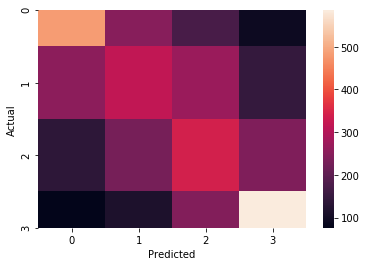

In [28]:
#For KNN heatmap, knowing that dropping day for KNN is helpful
knn = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn.fit(xDatetrain.drop(['day'], axis = 1), yDatetrain)
knnPredict = knn.predict(xDatetest.drop(['day'], axis = 1))

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(knnPredict)):
    if(knnPredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(knnPredict[i] - 1 == y_Datetest[i] or knnPredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(knnPredict[i] - 2 == y_Datetest[i] or knnPredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
        
    if(knnPredict[i] - 3 == y_Datetest[i] or knnPredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(knnPredict)*100,"%")
print("One away Predictions: ",oneOff/len(knnPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(knnPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(knnPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(knnPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(knnPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': knnPredict, 'y_Actual':    yDatetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [29]:
for i in range(2,20):
    print(i, " crossval Score:", sum(cross_val_score(knn, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(knn, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.38027431994486083
3  crossval Score: 0.3968284053575941
4  crossval Score: 0.40560834584469574
5  crossval Score: 0.41091261860067174
6  crossval Score: 0.410276513235542
7  crossval Score: 0.41425712409483006
8  crossval Score: 0.4109718132744448
9  crossval Score: 0.4179832205885737
10  crossval Score: 0.4215167497762435
11  crossval Score: 0.41368419571762194
12  crossval Score: 0.4187358002517578
13  crossval Score: 0.4252466068228579
14  crossval Score: 0.41987623558558074
15  crossval Score: 0.4214588854322695
16  crossval Score: 0.42064093721431367
17  crossval Score: 0.42106905474932316
18  crossval Score: 0.4232951662746184
19  crossval Score: 0.42442019545551407
Sectional crossval score: 0.40560834584469574


In [30]:
#Random forest testing

C:\Users\matts\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Correct Prediction:  43.41672984584281 %
One away Predictions:  36.7955521859995 %
Two away Predictions:  14.960828910791001 %
Three away Predictions:  4.826889057366692 %

1 or less Away Prediction:  80.2122820318423 %
2 or less Away Prediction:  95.17311094263331 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


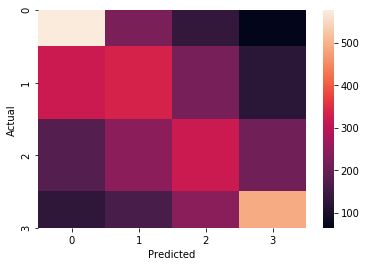

In [31]:
randomforest = RandomForestClassifier()
randomforest.fit(xDatetrain, yDatetrain)
ranPredict = randomforest.predict(xDatetest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(ranPredict[i] - 1 == y_Datetest[i] or ranPredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(ranPredict[i] - 2 == y_Datetest[i] or ranPredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
        
    if(ranPredict[i] - 3 == y_Datetest[i] or ranPredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(ranPredict)*100,"%")
print("One away Predictions: ",oneOff/len(ranPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(ranPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(ranPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(ranPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(ranPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': ranPredict, 'y_Actual':    yDatetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [32]:
#random forest tuning attempt
#Testing estimators level with max features
combinedAcc = []#relic, don't really care about it
accuracy = []
oneOff = []
twoOff = []
threeOff = []
estimators = 50
run = 0
while(True):
    print(run)
    accuracy.append([])
    oneOff.append([])
    twoOff.append([])
    threeOff.append([])
    for features in range(1, 8):
        randomforest = RandomForestClassifier(n_estimators = estimators, n_jobs = -1, max_features = features)
        randomforest.fit(xDatetrain, yDatetrain)
        ranPredict = randomforest.predict(xDatetest)
        accuracy[run].append(0)
        oneOff[run].append(0)
        twoOff[run].append(0)
        threeOff[run].append(0)


        for i in range(len(ranPredict)):
            if(ranPredict[i] == y_Datetest[i]):
                accuracy[run][features - 1] += 1
                continue

            if(ranPredict[i] - 1 == y_Datetest[i] or ranPredict[i] + 1 == y_Datetest[i]):
                oneOff[run][features - 1] += 1;
                continue

            if(ranPredict[i] - 2 == y_Datetest[i] or ranPredict[i] + 2 == y_Datetest[i]):
                twoOff[run][features - 1] += 1;
                continue

            if(ranPredict[i] - 3 == y_Datetest[i] or ranPredict[i] + 3 == y_Datetest[i]):
                threeOff[run][features - 1] += 1;
                continue

        accuracy[run][features - 1] = accuracy[run][features - 1]/len(ranPredict)
        oneOff[run][features - 1] = oneOff[run][features - 1]/len(ranPredict)
        twoOff[run][features - 1] = twoOff[run][features - 1]/len(ranPredict)
        threeOff[run][features - 1] = threeOff[run][features - 1]/len(ranPredict)
        combinedAcc.append(accuracy[run][features - 1] + oneOff[run][features - 1] + twoOff[run][features - 1])
    
    estimators += 50
    run += 1
    
    if(run > 14):
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [33]:
#Notes about this data, 
#The 0-14 is the steps of n_estimators ranging from 50 to 750
#The 0-6 are the max_features, ranging from 1-7

In [34]:
accDF = pd.DataFrame(accuracy)
oneOffDF = pd.DataFrame(oneOff)
twoOffDF = pd.DataFrame(twoOff)
threeOffDF = pd.DataFrame(threeOff)
print(oneOffDF)

           0         1         2         3         4         5         6
0   0.368966  0.363659  0.373768  0.371241  0.372252  0.362396  0.371999
1   0.372252  0.376548  0.368208  0.374273  0.367450  0.370230  0.368461
2   0.362901  0.371241  0.366439  0.373263  0.370483  0.365176  0.362143
3   0.361132  0.371746  0.365934  0.374021  0.371241  0.366692  0.374021
4   0.368714  0.365681  0.365428  0.370230  0.367956  0.368966  0.374779
5   0.367703  0.373515  0.368966  0.370988  0.369977  0.369472  0.370230
6   0.365176  0.364670  0.370735  0.366439  0.370230  0.369977  0.370988
7   0.370483  0.370230  0.371494  0.365176  0.370988  0.367450  0.371494
8   0.364670  0.367450  0.370483  0.377053  0.373010  0.372504  0.364923
9   0.359616  0.373515  0.367703  0.370988  0.366945  0.366692  0.367197
10  0.364670  0.373010  0.369977  0.369977  0.366692  0.373515  0.368208
11  0.364670  0.366945  0.369725  0.369977  0.371241  0.368714  0.369977
12  0.364670  0.373263  0.369977  0.369219  0.37149

AxesSubplot(0.125,0.125;0.62x0.755)


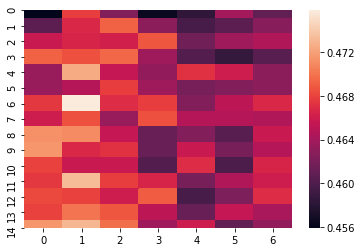

In [35]:
print(sn.heatmap(accDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


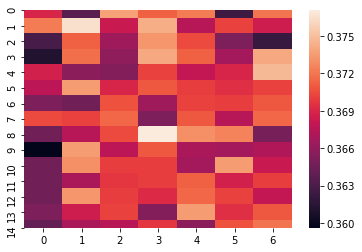

In [36]:
print(sn.heatmap(oneOffDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


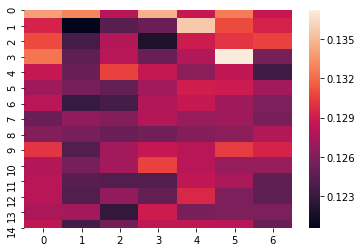

In [37]:
print(sn.heatmap(twoOffDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


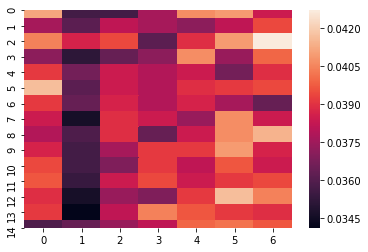

In [38]:
print(sn.heatmap(threeOffDF, annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


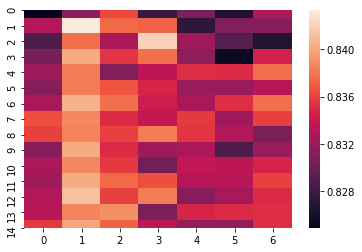

In [39]:
print(sn.heatmap(accDF.add(oneOffDF), annot=False))

AxesSubplot(0.125,0.125;0.62x0.755)


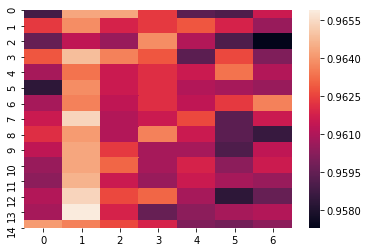

In [40]:
print(sn.heatmap(accDF.add(oneOffDF).add(twoOffDF), annot=False))

In [41]:
#General trends noticed 
#- If more features are able to be considered at once, there should be more estimators
#- Purely accurate seems to not like too many features (Above 3) and 200+ estimators is fine
#- One Off and Two Off both have a diagonal where for every feature added there should be ~50 more estimators
#- Two Off degrades as more features and estimators are added
#- Three Off does not particularly care.
#Conclusion, estimators should be kept in the 200-600 range and features around 2-4

Correct Prediction:  47.081122062168305 %
One away Predictions:  37.0988122314885 %
Two away Predictions:  12.332575183219612 %
Three away Predictions:  3.4874905231235784 %

1 or less Away Prediction:  84.17993429365681 %
2 or less Away Prediction:  96.51250947687642 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


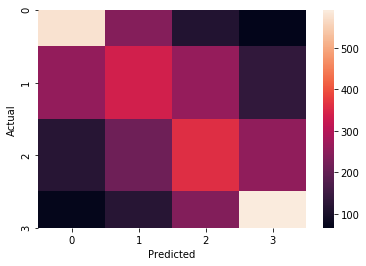

In [42]:
#Mildly tuned up random forest, mostly just more reliable at making the numbers come out
#n_estimators seems to work well in the sets of 500-550 and ~750
#Max features 3 works more consistantly than 2, but 2 can get ever so slightly higher numbers
randomforest = RandomForestClassifier(n_estimators = 700, n_jobs = -1, max_features = 2)
randomforest.fit(xDatetrain, yDatetrain)
ranPredict = randomforest.predict(xDatetest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(ranPredict[i] - 1 == y_Datetest[i] or ranPredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(ranPredict[i] - 2 == y_Datetest[i] or ranPredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
        
    if(ranPredict[i] - 3 == y_Datetest[i] or ranPredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(ranPredict)*100,"%")
print("One away Predictions: ",oneOff/len(ranPredict)*100,"%")
print("Two away Predictions: ",twoOff/len(ranPredict)*100,"%")
print("Three away Predictions: ",threeOff/len(ranPredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(ranPredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(ranPredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': ranPredict, 'y_Actual':    yDatetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [43]:
#Notes - Accuracy of the 20 sections is ~44%, accuracy of 4 sections in the same range is ~47%
#Additionally, increasing the sectioning past 20 still keeps the accuracy over a 25% range roughly the same.

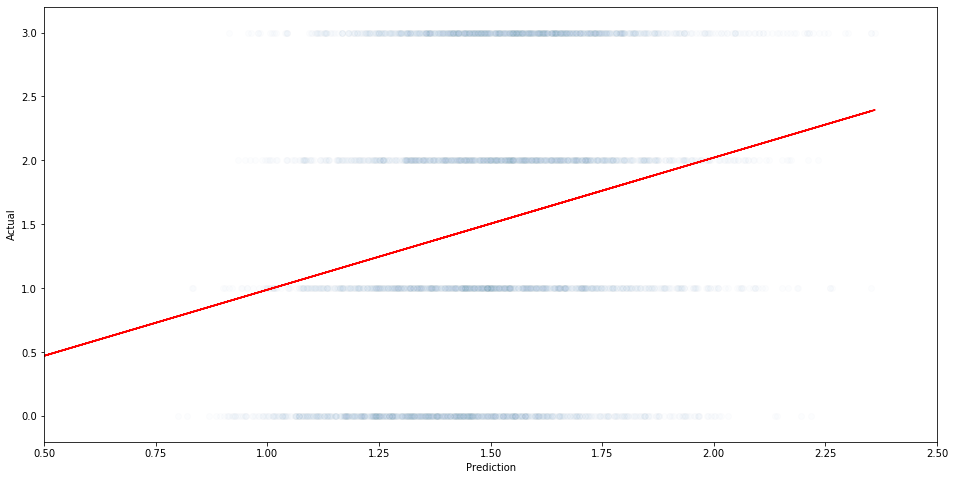

In [44]:
##Linear Regression
from sklearn.linear_model import LinearRegression

linRegresser = LinearRegression()
linRegresser.fit(xDatetrain, yDatetrain)
linPredict = linRegresser.predict(xDatetest)


plt.figure(figsize=(16,8))
plt.xlabel('Prediction')
plt.ylabel('Actual')



plt.xlim([0.5, 2.5])
plt.ylim([-0.2, 3.2])
##plt.plot(linPredict, m*linPredict+b, 'r')
m, b = np.polyfit(linPredict, y_Datetest, 1) ##fits a first degree polynomial to the data
plt.plot(linPredict, y_Datetest, 'o', alpha = 0.01)
plt.plot(linPredict, m*linPredict+b, 'r')

In [47]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

logRegresser = LogisticRegression()
logRegresser.fit(xDatetrain, yDatetrain)
logpredict = logRegresser.predict(xDatetest)

C:\Users\matts\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matts\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Correct Prediction:  30.073287844326508 %
One away Predictions:  31.0841546626232 %
Two away Predictions:  23.24993682082386 %
Three away Predictions:  15.592620672226435 %

1 or less Away Prediction:  61.157442506949714 %
2 or less Away Prediction:  84.40737932777357 %
Range of correct:  25.0 %
Range of one away:  75.0 %
Range of two away:  125.0 %
AxesSubplot(0.125,0.125;0.62x0.755)


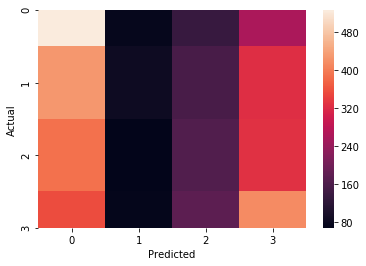

In [48]:
accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(logpredict)):
    if(logpredict[i] == y_Datetest[i]):
        accuracy += 1
        continue
        
    if(logpredict[i] - 1 == y_Datetest[i] or logpredict[i] + 1 == y_Datetest[i]):
        oneOff += 1;
        continue
        
    if(logpredict[i] - 2 == y_Datetest[i] or logpredict[i] + 2 == y_Datetest[i]):
        twoOff += 1;
        continue
    if(logpredict[i] - 3 == y_Datetest[i] or logpredict[i] + 3 == y_Datetest[i]):
        threeOff += 1;
        continue
                
print("Correct Prediction: ",accuracy/len(logpredict)*100,"%")
print("One away Predictions: ",oneOff/len(logpredict)*100,"%")
print("Two away Predictions: ",twoOff/len(logpredict)*100,"%")
print("Three away Predictions: ",threeOff/len(logpredict)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(logpredict)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(logpredict)*100,"%")
print("Range of correct: ", int((1/sections) * 10000)/100, "%")
print("Range of one away: ", int((1/sections) * 30000)/100, "%")
print("Range of two away: ", int((1/sections) * 50000)/100, "%")

data = {'y_Predicted': logpredict, 'y_Actual':    y_Datetest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=False))

In [50]:
for i in range(2,35):
    print(i, " crossval Score:", sum(cross_val_score(logRegresser, xfull, yfull, cv=i, n_jobs = -1))/i)
print("Sectional crossval score:", sum(cross_val_score(logRegresser, xfull, yfull, cv=sections, n_jobs = -1))/sections)

2  crossval Score: 0.27337473195550244
3  crossval Score: 0.27621935809957043
4  crossval Score: 0.2786819790421914
5  crossval Score: 0.2804518797328531
6  crossval Score: 0.28178120353765274
7  crossval Score: 0.27962792546894616
8  crossval Score: 0.28234265734265734
9  crossval Score: 0.2825364982398012
10  crossval Score: 0.2822191855261476
11  crossval Score: 0.2832283489491011
12  crossval Score: 0.28234529949955484
13  crossval Score: 0.28266451516559365
14  crossval Score: 0.2845004045524683
15  crossval Score: 0.28348432039021393
16  crossval Score: 0.2837362360421836
17  crossval Score: 0.28519335068643414
18  crossval Score: 0.28544520547945207
19  crossval Score: 0.28234296001782155
20  crossval Score: 0.28437163513305647
21  crossval Score: 0.28583423124963153
22  crossval Score: 0.2838034676372665
23  crossval Score: 0.2828508828325452
24  crossval Score: 0.28582932988420795
25  crossval Score: 0.28341294482923335
26  crossval Score: 0.2858187134502923
27  crossval Score